### Chargement des librarires :

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Chargement des bases de données liées aux caracteristiques pour les années 2017 à 2021 :


In [18]:
df_caracteristiques_2021 = pd.read_csv("data/caracteristiques-2021.csv", sep=';')
df_caracteristiques_2020 = pd.read_csv("data/caracteristiques-2020.csv", sep=';')
df_caracteristiques_2019 = pd.read_csv("data/caracteristiques-2019.csv", sep=';')

### Fusion et nettoyage des dataframes :

In [19]:
df = [df_caracteristiques_2019, df_caracteristiques_2020, df_caracteristiques_2021]
caracteristiques_2017_2021 = pd.concat(df)

In [20]:
caracteristiques_2019_2021 = caracteristiques_2017_2021.rename(columns={'jour':'day', 'mois':'month', 'an':'year'})

In [22]:
caracteristiques_2019_2021['year'] = caracteristiques_2019_2021['year'].replace(17, 2017)
caracteristiques_2019_2021['year'] = caracteristiques_2019_2021['year'].replace(18, 2018)

In [23]:
caracteristiques_2019_2021

,Num_Acc,day,month,year,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,30,11,2019,01:30,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
1,201900000002,30,11,2019,02:50,3,93,93066,1,1,1,6,AUTOROUTE A1,"48,9307000","2,3688000"
2,201900000003,28,11,2019,15:15,1,92,92036,1,1,1,4,AUTOROUTE A86,"48,9358718","2,3191744"
3,201900000004,30,11,2019,20:20,5,94,94069,1,1,1,4,A4,"48,8173295","2,4281502"
4,201900000005,30,11,2019,04:00,3,94,94028,1,1,1,2,A86 INT,"48,7763620","2,4332540"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,1,2021,06:10,3,33,33021,1,1,5,6,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,1,1,2021,10:20,1,38,38405,1,1,2,6,D520,"45,3802910000","5,7049140000"
56515,202100056516,1,1,2021,18:00,3,26,26064,1,1,2,1,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,1,1,2021,10:55,1,33,33003,1,2,1,6,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


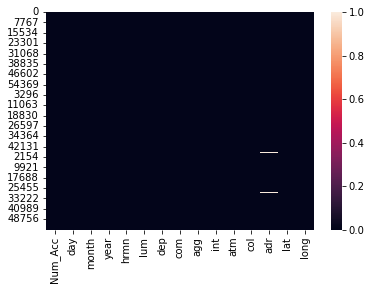

In [24]:
#Visualisation des valeurs manquantes à l'aide d'une carte thermique
sns.heatmap(caracteristiques_2019_2021.isna());

In [26]:
#Recodage des -1 (non renseigné) par des NaN
caracteristiques_2019_2021 = caracteristiques_2019_2021.replace(-1, np.nan)

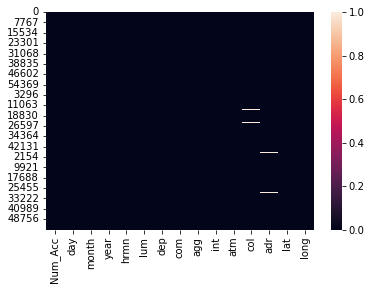

In [27]:
#Visualisation des valeurs manquantes après nettoyage
sns.heatmap(caracteristiques_2019_2021.isna());

In [28]:
#Recodage des 0 (sans objet) par des NaN
caracteristiques_2019_2021 = caracteristiques_2019_2021.replace(0, np.nan)

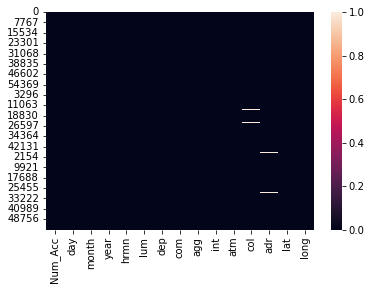

In [29]:
#Visualisation des valeurs manquantes après nettoyage
sns.heatmap(caracteristiques_2019_2021.isna());

In [34]:
#export du df final
caracteristiques_2019_2021.to_csv("merged_tables/caracteristiques_2019_2021.csv", index=False)

### Quelques statistiques descriptives...

In [31]:
#Nb d'accidents par année :
caracteristiques_2019_2021['year'].value_counts()

2019    58840
2021    56518
2020    47744
Name: year, dtype: int64

<AxesSubplot:>

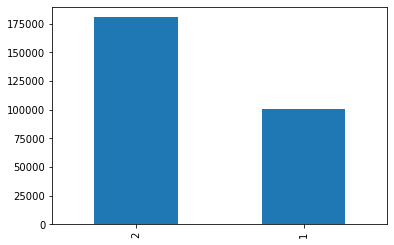

In [14]:
#Accidents ayant eu lieu hors agglomération (1) et en agglomération (2)
caracteristiques_2019_2021['agg'].value_counts().plot(kind='bar')

In [32]:
# Les trois mois regroupant le plus d'accidents sur les cinq années sont les suivants : Septembre, Juillet et Octobre
caracteristiques_2019_2021['month'].value_counts().sort_values(ascending=False)

9     16487
7     16129
10    15921
6     15696
12    13786
8     13643
5     12997
1     12731
11    12688
2     11928
3     11431
4      9665
Name: month, dtype: int64